In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score,f1_score


In [33]:
df = pd.read_csv('gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [34]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [35]:
df.shape

(5001, 8)

In [36]:
category = df.select_dtypes(include=['object','category'])
encoder = LabelEncoder()
for x in category:
    df[x] = encoder.fit_transform(df[x])
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [37]:
df2 = df[['long_hair','gender','forehead_width_cm']]
corr = df2.corr()
corr

,long_hair,gender,forehead_width_cm
long_hair,1.000000,-0.010767,-0.006530
gender,-0.010767,1.000000,0.334125
forehead_width_cm,-0.006530,0.334125,1.000000


<Axes: >

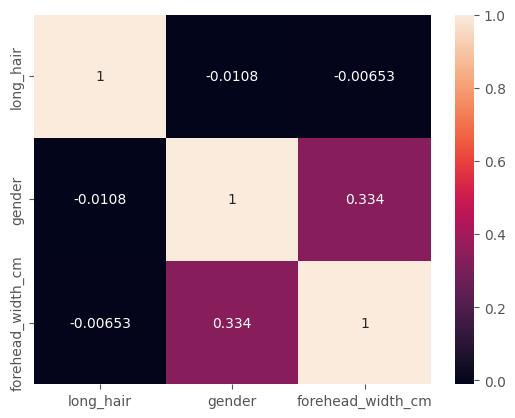

In [38]:
sns.heatmap(corr,annot=True, fmt = '0.3g')

In [39]:
df2 = df[['nose_wide','gender','distance_nose_to_lip_long']]
corr = df2.corr()
corr

,nose_wide,gender,distance_nose_to_lip_long
nose_wide,1.000000,0.758502,0.569303
gender,0.758502,1.000000,0.754850
distance_nose_to_lip_long,0.569303,0.754850,1.000000


<Axes: >

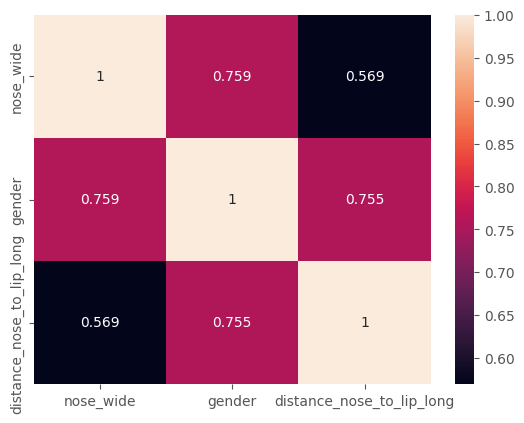

In [40]:
sns.heatmap(corr,annot=True, fmt = '0.3g')

In [41]:
df2 = df[['nose_wide','gender','distance_nose_to_lip_long']]
corr = df2.corr()
corr

,nose_wide,gender,distance_nose_to_lip_long
nose_wide,1.000000,0.758502,0.569303
gender,0.758502,1.000000,0.754850
distance_nose_to_lip_long,0.569303,0.754850,1.000000


<Axes: >

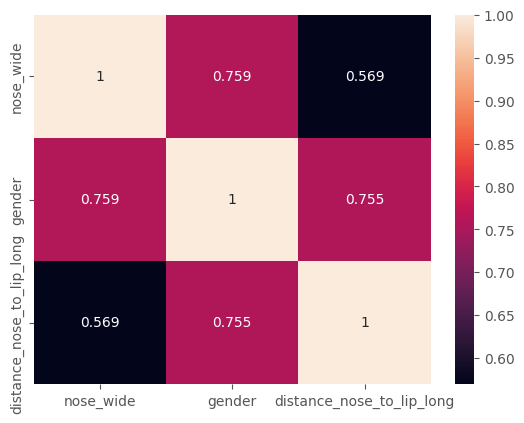

In [42]:
sns.heatmap(corr,annot=True, fmt = '0.3g')

In [43]:
df2 = df[['nose_long','gender','lips_thin']]
corr = df2.corr()
corr

,nose_long,gender,lips_thin
nose_long,1.000000,0.744147,0.561229
gender,0.744147,1.000000,0.743319
lips_thin,0.561229,0.743319,1.000000


<Axes: >

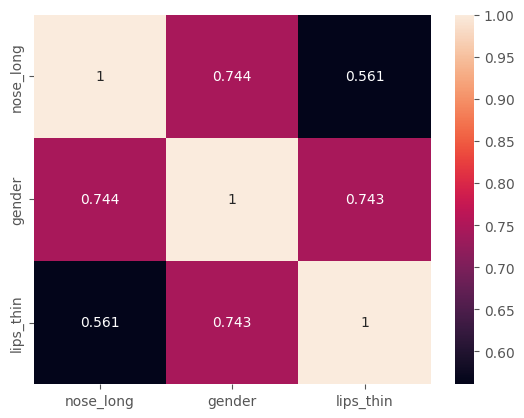

In [44]:
sns.heatmap(corr,annot=True, fmt = '0.3g')

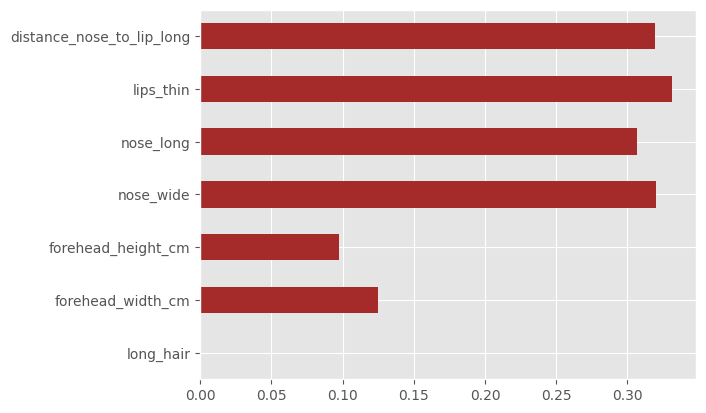

In [45]:
x = df.drop(['gender'], axis = 1)
y = df['gender']
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
plt.style.use('ggplot')
importance = mutual_info_regression(x,y)
feature_impor = pd.Series(importance,x.columns[0:len(x.columns)])
feature_impor.plot(kind = 'barh', color = 'brown')
plt.show()

In [46]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2,random_state=1)

In [47]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(xtrain,ytrain)

LogisticRegression(solver='liblinear')

In [48]:
pred1 = logreg.predict(xtest)
pred1

array([0, 1, 0, ..., 1, 1, 0])

In [49]:
print((classification_report)(ytest,pred1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       504
           1       0.96      0.94      0.95       497

    accuracy                           0.95      1001
   macro avg       0.95      0.95      0.95      1001
weighted avg       0.95      0.95      0.95      1001



In [50]:
print(recall_score(ytest,pred1, average='weighted'))
print(f1_score(ytest,pred1, average='weighted'))
print(precision_score(ytest,pred1, average='weighted'))


0.952047952047952
0.9520370368818912
0.9523000135802822
